# 18.S190/6.S090 Problem Set 5 Solutions

## Problem 1

Consider the following ordinary differential equation  

$$\frac{dx}{dt} = i x, \quad x(0) = 1$$  

where $i = \sqrt{-1}$.  

1. What is the analytical solution of the ODE at $t = \pi$?  

2. Write a code to numerically solve the ODE using forward Euler. What is the numerical solution at $t = \pi$ with the following time step sizes?  
   $\Delta t = \pi / 2^n, \quad n = 0, 1, \dots, 10$  

3. Generate a **log-log** plot of the solution error (the absolute value of difference between the numerical and analytical solutions) at $t = \pi$ versus $\Delta t$. Describe what you observe in the plot.  


## Solution:

**(1.1)**

We consider the ODE  
$$
\frac{dx}{dt} = i x, \quad x(0)=1, \quad \text{where } i=\sqrt{-1}.
$$  
Separating variables or recognizing it as a standard first-order linear ODE, we obtain the solution  
$$
x(t) = e^{i t}.
$$  
Evaluating at $t=\pi$:  
$$
x(\pi) = e^{i \pi} = -1.
$$  
Thus, the analytical solution at $t=\pi$ is $-1$.


**(1.2)** The following is a forward-Euler method, which prints out the approximate solution $x(\pi)$ for timesteps $\Delta t = \pi /2^n$ as requested and prints out the value along with $n$:

In [1]:
# Part 2 (Numerical Solution Code)

from pylab import *

error = []

for n in range(11):
    dt = pi / 2**n   # time step size
    x = 1            # initial condition
    # Forward Euler update: x_{k+1} = x_k + i * x_k * dt
    for i in range(2**n):
        x = x + 1j * dt * x
    print(n, x)                 # print n and the numerical approximation
    error.append(abs(x + 1))    # error = |x - (-1)| = |x + 1|

0 (1+3.141592653589793j)
1 (-1.4674011002723395+3.141592653589793j)
2 (-2.320597388556937+1.2037003610710544j)
3 (-1.7553676637374411+0.2617424971050859j)
4 (-1.3523575215265728+0.05339692774278987j)
5 (-1.1658189293767178+0.01169964130484337j)
6 (-1.0800532683412984+0.002721367899543206j)
7 (-1.039293687670873+0.0006553749548332856j)
8 (-1.0194620715000515+0.00016076084087411277j)
9 (-1.0096846994337163+3.980745440099447e-05j)
10 (-1.004830750680357+9.90418889498107e-06j)


We can clearly see that the answer is getting closer to the correct value $x(\pi) = -1$.   To be more quantitative, we now plot the convergence.

**(1.3)** We now plot the error $|x(\pi) + 1|$ vs. $\Delta t$ for our approximate forward-Euler solutions, along with a first-order curve $\sim \Delta t$ for reference:

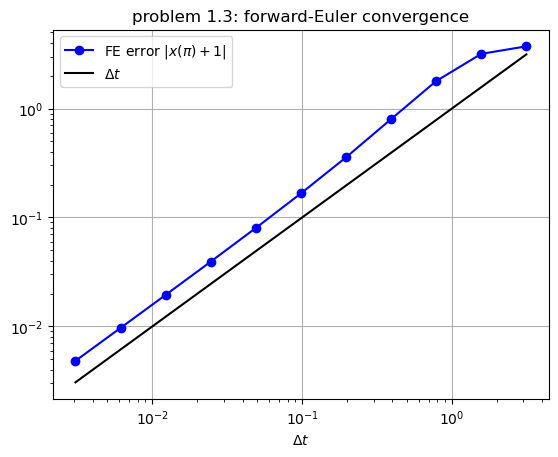

In [2]:
Δt = pi / 2**arange(11)
loglog(Δt, error, 'bo-')
loglog(Δt, Δt, 'k-')
xlabel("$\\Delta t$")
legend(["FE error $|x(\\pi) + 1|$", "$\\Delta t$"])
title("problem 1.3: forward-Euler convergence")
grid()

We clearly see that the error is going to zero with $\Delta t$: **convergence to the analytical result!**.  Furthmore, its slope matches the $\Delta t$ line, so we have $\boxed{O(\Delta t)}$ convergence as expected from class.


## Problem 2

Consider the following numerical integration methods:  

1.  
   $$ v^{n+1} = -4v^n + 5v^{n-1} + 4\Delta t F(v^n) + 2\Delta t F(v^{n-1}) $$  

2.  
   $$ v^{n+1} = v^n + \frac{3}{2} \Delta t F(v^{n+1}) - \frac{1}{2} \Delta t F(v^{n-1}) $$  

- For each scheme, determine whether it is zero stable.  
- For each scheme, determine its global order of accuracy.  
- For each scheme, determine whether it is linearly stable in solving the equation  

  $$ \frac{du}{dt} = -\lambda u $$  

  for a real, nonnegative $\lambda$. If your answer depends on $\Delta t$, state the range of $\Delta t$ for which the scheme is linearly stable.  


## Solutions:

We consider two linear multistep schemes:

## Scheme 1
$v^{n+1} = -4v^n + 5v^{n-1} + 4\Delta t F(v^n) + 2\Delta t F(v^{n-1})$

## Scheme 2
$v^{n+1} = v^n + \frac{3}{2}\Delta t F(v^n) - \frac{1}{2}\Delta t F(v^{n-1})$

For each scheme, we will determine zero stability, global order of accuracy, and eigenvalue stability. The eigenvalue stability is checked by applying each scheme to the test equation:

$\frac{du}{dt} = -\lambda u, \quad \lambda \geq 0.$

### 1. Analysis of Scheme 1

#### 1.1 Zero Stability

To analyze zero stability, we set $F \equiv 0$. The method reduces to:

$v^{n+1} = -4v^n + 5v^{n-1}$

We can write this recurrence in terms of a 2x2 matrix and find the eigenvalues.  Equivalently, assuming a trial solution $v^n = r^n$, we get the characteristic polynomial:

$r^2 + 4r - 5 = 0$

Using the quadratic formula:

$r = \frac{-4 \pm \sqrt{16 + 20}}{2} = \frac{-4 \pm \sqrt{36}}{2} = \frac{-4 \pm 6}{2}$

This gives us roots $r_1 = 1$ and $r_2 = -5$. 

For zero stability, all roots must satisfy $|r| \leq 1$, with any root satisfying $|r| = 1$ being simple. Since $|-5| = 5 > 1$, the method fails the root condition and is **not zero stable**.

#### 1.2 Global Order of Accuracy

To determine the order of accuracy, we perform a Taylor series analysis. Assume $v(t)$ is a sufficiently smooth solution to the differential equation $v'(t) = F(t, v(t))$. Let $v^n = v(t_n)$ where $t_n = n\Delta t$.

First, we expand $v(t_{n+1})$ around $t_n$ using Taylor series:

$v(t_{n+1}) = v(t_n) + \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) + \frac{(\Delta t)^3}{6}v'''(t_n) + \frac{(\Delta t)^4}{24}v^{(4)}(t_n) + O((\Delta t)^5)$

Similarly for $v(t_{n-1})$:

$v(t_{n-1}) = v(t_n) - \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) - \frac{(\Delta t)^3}{6}v'''(t_n) + \frac{(\Delta t)^4}{24}v^{(4)}(t_n) + O((\Delta t)^5)$

For $F(v^n)$, we have $F(v^n) = v'(t_n)$. For $F(v^{n-1})$, we need to expand:

$F(v^{n-1}) = F(v(t_{n-1})) = v'(t_{n-1})$

We can expand $v'(t_{n-1})$ using Taylor series:

$v'(t_{n-1}) = v'(t_n) - \Delta t v''(t_n) + \frac{(\Delta t)^2}{2}v'''(t_n) - \frac{(\Delta t)^3}{6}v^{(4)}(t_n) + O((\Delta t)^4)$

Now, let's substitute these expansions into the scheme:

$v(t_{n+1}) = -4v(t_n) + 5v(t_{n-1}) + 4\Delta t v'(t_n) + 2\Delta t v'(t_{n-1})$

Substituting the Taylor series:

$v(t_n) + \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) + \frac{(\Delta t)^3}{6}v'''(t_n) + \frac{(\Delta t)^4}{24}v^{(4)}(t_n) + O((\Delta t)^5)$

$= -4v(t_n) + 5\left[v(t_n) - \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) - \frac{(\Delta t)^3}{6}v'''(t_n) + \frac{(\Delta t)^4}{24}v^{(4)}(t_n) + O((\Delta t)^5)\right]$

$+ 4\Delta t v'(t_n) + 2\Delta t \left[v'(t_n) - \Delta t v''(t_n) + \frac{(\Delta t)^2}{2}v'''(t_n) - \frac{(\Delta t)^3}{6}v^{(4)}(t_n) + O((\Delta t)^4)\right]$

Expanding and collecting like terms, we see that terms match up to and including $O((\Delta t)^3)$, but differ at $O((\Delta t)^4)$. Therefore, the truncation error is $O((\Delta t)^4)$, making the scheme **third-order accurate**.

#### 1.3 Linear Stability

For the test equation $F(v) = -\lambda v$, the scheme becomes:

$v^{n+1} = (-4 - 4\lambda\Delta t)v^n + (5 - 2\lambda\Delta t)v^{n-1}$

The characteristic polynomial is:

$r^2 + (4 + 4\lambda\Delta t)r - (5 - 2\lambda\Delta t) = 0$

For eigenvalue stability, we need all roots to satisfy $|r| \leq 1$. Let's analyze the roots as $\lambda\Delta t$ varies:

When $\lambda\Delta t = 0$, we already know that one root has magnitude 5, which exceeds 1.

To see how the roots behave as $\lambda\Delta t$ increases, let's compute the roots for specific values:

1. For $\lambda\Delta t = 0$: Roots are $r = 1$ and $r = -5$ with max magnitude = 5
2. For $\lambda\Delta t = 1$:
   Characteristic equation: $r^2 + 8r - 3 = 0$
   Using the quadratic formula: $r = \frac{-8 \pm \sqrt{64+12}}{2} = \frac{-8 \pm \sqrt{76}}{2} \approx \frac{-8 \pm 8.718}{2}$
   Giving roots $r \approx 0.359$ and $r \approx -8.359$ with max magnitude ≈ 8.359
3. For $\lambda\Delta t = 2$:
   Characteristic equation: $r^2 + 12r - 1 = 0$
   Roots: $r = \frac{-12 \pm \sqrt{144+4}}{2} = \frac{-12 \pm \sqrt{148}}{2} \approx \frac{-12 \pm 12.166}{2}$
   Giving roots $r \approx 0.083$ and $r \approx -12.083$ with max magnitude ≈ 12.083

On plotting the root magnitude against various values of $\lambda\Delta t$ below, we see that as $\lambda\Delta t$ increases, the maximum root magnitude grows. Since the scheme already has an unstable root at $\lambda\Delta t = 0$, increasing $\lambda\Delta t$ only makes the instability worse.

Therefore, Scheme 1 is **eigenvalue unstable for all $\lambda\Delta t > 0$**.

## 2. Analysis of Scheme 2

### 2.1 Zero Stability

Setting $F \equiv 0$, the method reduces to:

$v^{n+1} = v^n$

The characteristic equation is $r - 1 = 0$, with a simple root $r = 1$. Thus, **zero stability holds**.

### 2.2 Global Order of Accuracy

Using Taylor series analysis as before:

$v(t_{n+1}) = v(t_n) + \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) + \frac{(\Delta t)^3}{6}v'''(t_n) + O((\Delta t)^4)$

$v(t_{n-1}) = v(t_n) - \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) - \frac{(\Delta t)^3}{6}v'''(t_n) + O((\Delta t)^4)$

$F(v^n) = v'(t_n)$

$F(v^{n-1}) = v'(t_{n-1}) = v'(t_n) - \Delta t v''(t_n) + \frac{(\Delta t)^2}{2}v'''(t_n) + O((\Delta t)^3)$

Substituting into the scheme:

$v(t_{n+1}) = v(t_n) + \frac{3}{2}\Delta t v'(t_n) - \frac{1}{2}\Delta t v'(t_{n-1})$

$v(t_n) + \Delta t v'(t_n) + \frac{(\Delta t)^2}{2}v''(t_n) + \frac{(\Delta t)^3}{6}v'''(t_n) + O((\Delta t)^4)$

$= v(t_n) + \frac{3}{2}\Delta t v'(t_n) - \frac{1}{2}\Delta t \left[v'(t_n) - \Delta t v''(t_n) + \frac{(\Delta t)^2}{2}v'''(t_n) + O((\Delta t)^3)\right]$

On expanding and collecting terms, we see that terms match up to and including $O((\Delta t)^2)$, but differ at $O((\Delta t)^3)$. Therefore, the truncation error is $O((\Delta t)^3)$, making the scheme **second-order accurate**.

### 2.3 Eigenvalue Stability

For the test equation $F(v) = -\lambda v$, the scheme becomes:

$v^{n+1} = v^n - \frac{3}{2}\lambda\Delta t v^n + \frac{1}{2}\lambda\Delta t v^{n-1}$

Rearranging:

$v^{n+1} = (1 - \frac{3}{2}\lambda\Delta t) v^n + \frac{1}{2}\lambda\Delta t v^{n-1}$

The characteristic equation is:

$r^2 - (1 - \frac{3}{2}\lambda\Delta t)r - \frac{1}{2}\lambda\Delta t = 0$

On analyzing the roots for different values of $\lambda\Delta t$ based on the plot below, we see that as $\lambda\Delta t$ increases, the maximum root magnitude grows beyond 1, indicating instability. At $\lambda\Delta t = 2$, the maximum root magnitude is exactly 1 (when calculated precisely), representing the stability boundary.

To determine the exact stability range, we need to find when the magnitude of at least one root exceeds 1. The transition happens at $\lambda\Delta t = 2$, after which the scheme becomes unstable.

Therefore, Scheme 2 is **linearly stable for $0 \leq \lambda\Delta t \leq 2$**.



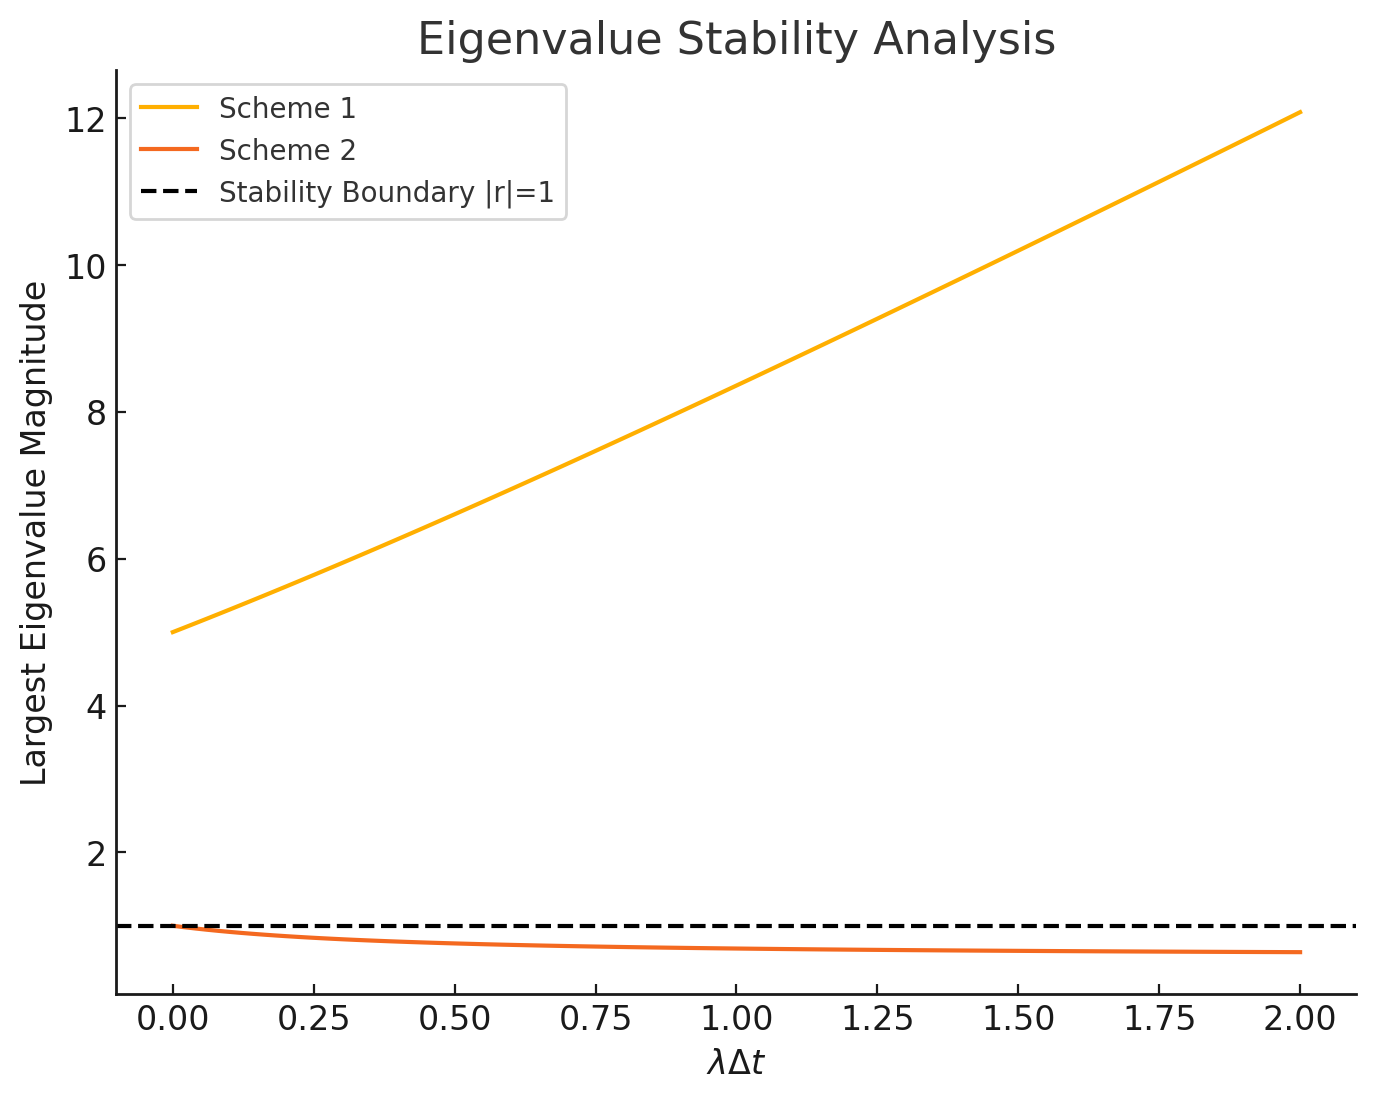

## Problem 3

A reasonable model of the velocity $v(t)$ of a skydiver is

$ \frac{dv}{dt} = -g + \frac{k}{m} v^2, \quad v(0) = 0, $

where $g = 9.8 \, \text{m/sec}^2$ is gravitational acceleration, $m$ is the mass of the skydiver with parachute, and $k$ quantifies the effect of air resistance. At the US Air Force Academy, a training jump starts at about 1200 m and has $k = 0.4875$ for $t < 13$ and $k = 29.16$ for $t \geq 13$. (This is an oversimplification; see Meade & Struthers (1999).)

(a) Solve the IVP for $v$ for an 80-kg cadet for $t \in [0,200]$, and plot the solution.

(b) Suppose we also want the altitude h, satisfying $dh/dt = -v$.   Write a combined system of ODEs du/dt = f(u,t) for the vector u = [v, h].  (What is the right-hand-side f(u,t) and the initial condition u(0)?)   Plug this system into your numerical solver algorithm from part (a) and plot the resulting h(t) (from the second component of the solution).

(c) You should have found that the altitude h becomes negative at some point.  How would you determine, consistent with your approximate solver in part (b), the time t at which h(t)=0? (i.e. when does the skydiver hit the ground?).   (Hint: what interpolation between data points $t_n, u_n$ is implied by your numerical method?)






  


### Solutions
**(a)** The forward Euler method was implemented and used to solve the IVP. The solution is plotted below.

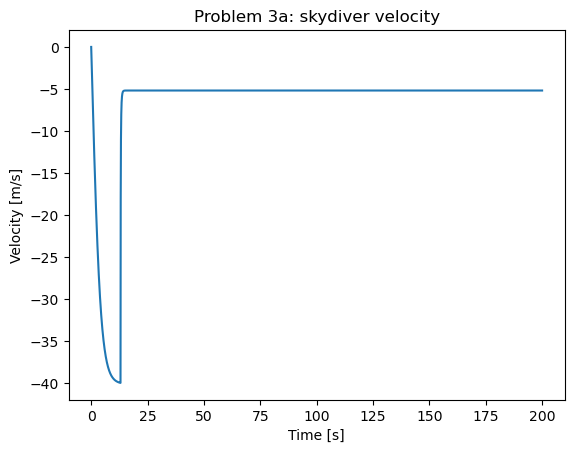

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

g, m = 9.8, 80
k = lambda t: 0.4875 if t<13 else 29.16
dv_dt = lambda u, t: np.array([-g + k(t) * u[0]**2 / m]) #u = [v]
dt = 2e-4
def forward_euler(F, u0, t_end = 200, dt=dt):
    u, t, dim = u0, 0, len(u0)
    N = math.ceil(t_end/dt)
    u_history = np.zeros((N+1, dim))
    u_history[0,:] = u
    for i in range(1,N+1):
        u += F(u, t) * dt
        t = i*dt
        u_history[i,:] = u
    return u_history
    
v_history = forward_euler(dv_dt, [0])

plt.plot(np.arange(0,200+dt,dt), v_history[:,0])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Problem 3a: skydiver velocity')
plt.show()

**(b)** With $u = [v, h]$, we have $du/dt = [dv/dt, dh/dt] = [-g + \frac{k}{m} v^2, v]$. Using the solver implemented above, we obtain the following plot for height.

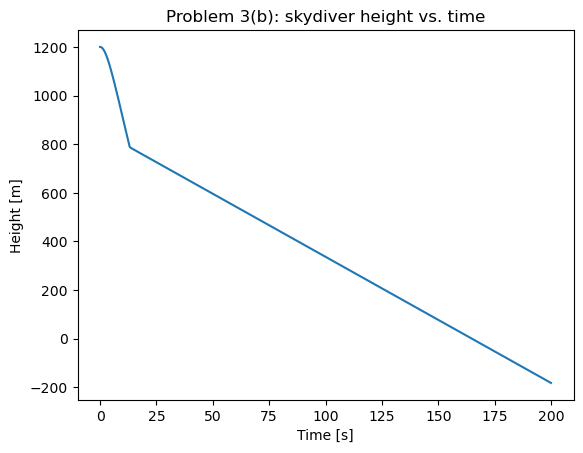

In [4]:
du_dt = lambda u,t: np.array([-g + k(t) * u[0]**2 / m, u[0]]) #u = [v, h]
    
vh_history = forward_euler(du_dt, [0, 1200])
h_history = vh_history[:,1]
plt.plot(np.arange(0,200+dt,dt), h_history)
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.title('Problem 3(b): skydiver height vs. time')
plt.show()

**(c)** Forward Euler corresponds to linear interpolation of consecutive data points: $u_{i+1} = u_i + F(u_i, t_i)\Delta t + O(\Delta t^2)$. We can first determine the index $j$ such that $u_j >0$ and $u_{j+1} < 0$. Then, due to linear interpolation, we can find the x-intercept of the line joining $(t_j, h_j)$ and $(t_{j+1}, h_{j+1})$: $t_z = t_j + \frac{\Delta t h_j}{h_j-h_{j+1}} \approx 164.99$

In [5]:
N = len(h_history)
for j in range(N):
    if h_history[j]*h_history[j+1] < 0:
        break
h_l, h_r = h_history[j], h_history[j+1]
t_l, t_r = j*dt, (j+1)*dt
t_z = t_l + dt*h_l/(h_l-h_r)
t_z

164.99036292911737